## 基礎題 - 算出斜率w與截距b

y = wx + b

記得計算前X須符合資料格式
$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

x-1d (50,)
X-2d (50, 1)
X:
 [[ 0.        ]
 [ 0.20408163]
 [ 0.40816327]
 [ 0.6122449 ]
 [ 0.81632653]
 [ 1.02040816]
 [ 1.2244898 ]
 [ 1.42857143]
 [ 1.63265306]
 [ 1.83673469]
 [ 2.04081633]
 [ 2.24489796]
 [ 2.44897959]
 [ 2.65306122]
 [ 2.85714286]
 [ 3.06122449]
 [ 3.26530612]
 [ 3.46938776]
 [ 3.67346939]
 [ 3.87755102]
 [ 4.08163265]
 [ 4.28571429]
 [ 4.48979592]
 [ 4.69387755]
 [ 4.89795918]
 [ 5.10204082]
 [ 5.30612245]
 [ 5.51020408]
 [ 5.71428571]
 [ 5.91836735]
 [ 6.12244898]
 [ 6.32653061]
 [ 6.53061224]
 [ 6.73469388]
 [ 6.93877551]
 [ 7.14285714]
 [ 7.34693878]
 [ 7.55102041]
 [ 7.75510204]
 [ 7.95918367]
 [ 8.16326531]
 [ 8.36734694]
 [ 8.57142857]
 [ 8.7755102 ]
 [ 8.97959184]
 [ 9.18367347]
 [ 9.3877551 ]
 [ 9.59183673]
 [ 9.79591837]
 [10.        ]]
Y:
 [ 0.27312969  0.60313347  0.93313726  1.26314103  1.59314481  1.92314858
  2.25315238  2.58315615  2.91315993  3.2431637   3.57316749  3.90317127
  4.23317504  4.56317882  4.89318261  5.22318639  5.55319016  5.8831939

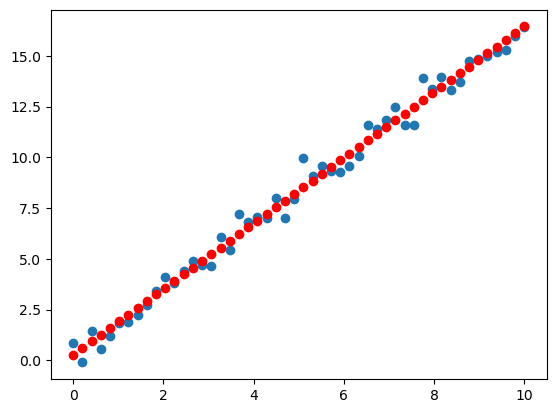

In [3]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
from sklearn.linear_model import LinearRegression

#將模型工具指派給一變數做使用
regr = LinearRegression()

#注意轉換x得格式1D->2D
print("x-1d", x.shape)
X = x.reshape(-1,1)
print("X-2d", X.shape)
print("X:\n", X)

#將x,y資料導入LinearRegression演算法做訓練
regr.fit(X,y)
Y = regr.predict(X)
print("Y:\n", Y)

plt.scatter(x, y) #原本 
plt.plot(x, Y, 'ro') #預測
#calculate mse
mse = np.sum((Y-y)**2) / len(y)
print("MSE:", mse)

#列印出訓練完成之函數的斜率與截距
W=regr.coef_#斜率
print("斜率:", W)
b=regr.intercept_ #截距
print("截距:", b)
print("Y=W * 1.83673469 + b=", (W * 1.83673469 + b))

## 進階題 - 切割資料集分別做訓練與預測(訓練資料80%、測試資料20%)


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])


訓練資料筆數: 40 訓練結果筆數: 40
測試資料筆數: 10 測試結果筆數: 10


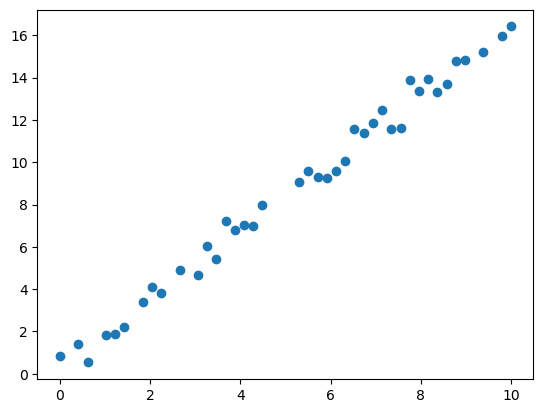

In [5]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
from sklearn.linear_model import LinearRegression

#匯入在sklearn.model_selection套件裡面的train_test_split模組
from sklearn.model_selection import train_test_split

#切割數據集(訓練資料80%、測試資料20%，設定random_state=20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print("訓練資料筆數: "+str(len(x_train)), "訓練結果筆數: "+str(len(y_train)))
print("測試資料筆數: "+str(len(x_test)), "測試結果筆數: "+str(len(y_test)))

#畫出訓練資料集的matplotlib圖形m
plt.scatter(x_train, y_train)


## 用訓練資料來 fit 函數
1. 只用訓練資料集的資料進行linear regression演算法<br>
2. 並計算出訓練階段的MSE
3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_train.PNG)

In [6]:
#1.只用訓練資料集的資料進行linear regression演算法
regr = LinearRegression()
X_train = x_train.reshape(-1,1)
regr.fit(X_train,y_train)
Y_train = regr.predict(X_train)

#2.並計算出訓練階段的MSE
mse = np.sum((Y_train-y_train)**2) / len(y_train)
print("MSE:", mse)

MSE: 0.2284495300761316


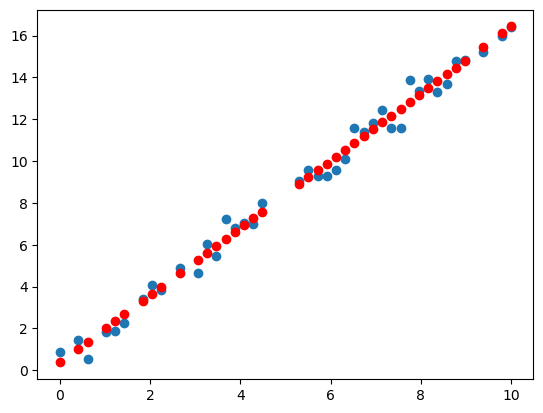

In [7]:
#3.畫出目標點(藍色)與預測點(紅色)的對應圖
plt.scatter(x_train, y_train) #原本 
plt.plot(x_train, Y_train, 'ro') #預測

## 將訓練出來的函數預測測試集的X值
1. 使用剛剛訓練出來的模型進行測試資料集的資料預測*注意reshape<br>
使用X = 2.44897959，預測出來數值應該為 4.3025375<br>
所有測試集資料
$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [8]:
X_test = x_test.reshape(-1,1)
Y_test = regr.predict(X_test)

print(X_test)
print(Y_test)

[[2.44897959]
 [2.85714286]
 [0.81632653]
 [1.63265306]
 [9.18367347]
 [0.20408163]
 [5.10204082]
 [4.89795918]
 [9.59183673]
 [4.69387755]]
[ 4.3025375   4.95828946  1.67952971  2.99103361 15.12244466  0.69590179
  8.56492518  8.23704919 15.7781966   7.90917322]


In [9]:
#Y=WX+b
W=regr.coef_
b=regr.intercept_
print("Y = W * 2.44897959 + b =", W*2.44897959+b)

Y = W * 2.44897959 + b = [4.3025375]


2. 並計算出測試階段的MSE

In [10]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)
print(mse)

0.41344072565862955


3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_test.PNG)

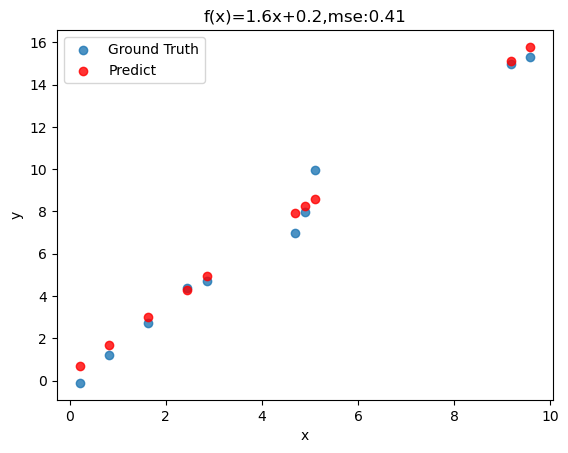

In [11]:
title='f(x)=1.6x+0.2'+',mse:'+str(round(mse,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict')
plt.legend()